In [1]:
import math

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, Dropout, BatchNormalization
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras.layers.normalization import BatchNormalization
import numpy as np
#import pylab as plt
import os

In [2]:

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
raw_X = np.load('data.npy')
raw_Y = np.load('fac.npy')
raw_X = np.expand_dims(raw_X, -1)

In [3]:
print(raw_X.shape,raw_Y.shape)

(3000, 33, 128, 128, 1) (3000, 3)


In [4]:

Xtrain = raw_X[:-1000]
Ytrain = raw_Y[:-1000]
Xtest = raw_X[-1000:]
Ytest = raw_Y[-1000:]
print(Xtrain.shape, Ytest.shape)

(2000, 33, 128, 128, 1) (1000, 3)


In [6]:
model = Sequential()
model.add(Conv3D(32, kernel_size=(3, 3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(33,128,128,1)))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.5))
model.add(Conv3D(64, kernel_size=(3, 3, 3),padding='same',  activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.5))
model.add(Conv3D(32, kernel_size=(3, 3, 3),padding='same',  activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])
# model.compile(loss='categorical_crossentropy',
#               optimizer=keras.optimizers.Adam(lr=0.001),
#               metrics=['accuracy'])
model.summary()
# Fit data to model


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_3 (Conv3D)            (None, 33, 128, 128, 32)  896       
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 16, 64, 64, 32)    0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 16, 64, 64, 32)    128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 64, 64, 32)    0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 16, 64, 64, 64)    55360     
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 8, 32, 32, 64)     0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 8, 32, 32, 64)    

In [7]:
BATCH_SIZE = 64
NUM_EPOCHS = 20
history=model.fit(Xtrain, Ytrain, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(Xtest, Ytest), shuffle=True)

model.save('model.h5')

Epoch 1/20
32/32 [==============================] - 3007s 94s/step - loss: 2.0268 - mean_squared_error: 2.0268 - val_loss: 3.9901 - val_mean_squared_error: 3.9901
Epoch 2/20
32/32 [==============================] - 3004s 94s/step - loss: 1.9919 - mean_squared_error: 1.9919 - val_loss: 3.9901 - val_mean_squared_error: 3.9901
Epoch 3/20
32/32 [==============================] - 3011s 94s/step - loss: 1.9919 - mean_squared_error: 1.9919 - val_loss: 3.9901 - val_mean_squared_error: 3.9901
Epoch 4/20
32/32 [==============================] - 3009s 94s/step - loss: 1.9919 - mean_squared_error: 1.9919 - val_loss: 2.7086 - val_mean_squared_error: 2.7086
Epoch 5/20
32/32 [==============================] - 3010s 94s/step - loss: 1.9919 - mean_squared_error: 1.9919 - val_loss: 1.9968 - val_mean_squared_error: 1.9968
Epoch 6/20
32/32 [==============================] - 3004s 94s/step - loss: 1.9919 - mean_squared_error: 1.9919 - val_loss: 1.9968 - val_mean_squared_error: 1.9968
Epoch 7/20
32/32 [====

In [8]:
score, _ = model.evaluate(Xtest, Ytest, batch_size=BATCH_SIZE)
rmse = math.sqrt(score)
print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))


16/16 [==============================] - 46s 3s/step - loss: 1.9968 - mean_squared_error: 1.9968

MSE: 1.997, RMSE: 1.413


In [9]:
pre = model.predict(Xtest, batch_size=BATCH_SIZE)

In [10]:
pre.shape

(1000, 3)

In [11]:
Ytest.shape

(1000, 3)

In [12]:
result=np.squeeze(pre)

In [13]:
result.shape

(1000, 3)

In [14]:
label=np.squeeze(Ytest)

In [15]:
label.shape

(1000, 3)

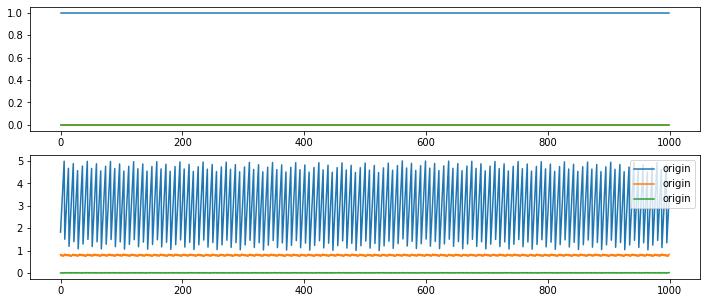

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(211)
plt.plot(result,label='predctions')
plt.subplot(212)
plt.plot(label,label='origin')
plt.legend()
plt.show()

In [17]:
ae=np.maximum(result-label,label-result)
mae0=np.mean(ae[0])
mae1=np.mean(ae[1])
mae2=np.mean(ae[2])
mse0 = math.sqrt(mae0)
mse1 = math.sqrt(mae1)
mse2 = math.sqrt(mae2)
print("\nMAE0: {:.3f}, MAE1: {:.3f}, MAE2: {:.3f},".format(mae0, mae1,mae2))
print("\nMSE0: {:.3f}, MSE1: {:.3f}, MSE2: {:.3f},".format(mse0, mse1,mse2))


MAE0: 0.553, MAE1: 0.713, MAE2: 0.905,

MSE0: 0.743, MSE1: 0.844, MSE2: 0.951,


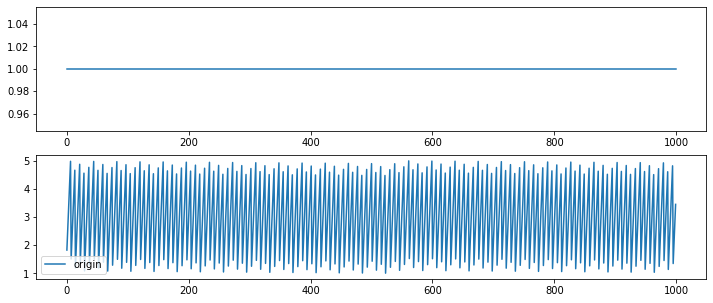

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.plot(result[:,0],label='predctions')
plt.subplot(212)
plt.plot(label[:,0],label='origin')
plt.legend()
plt.show()

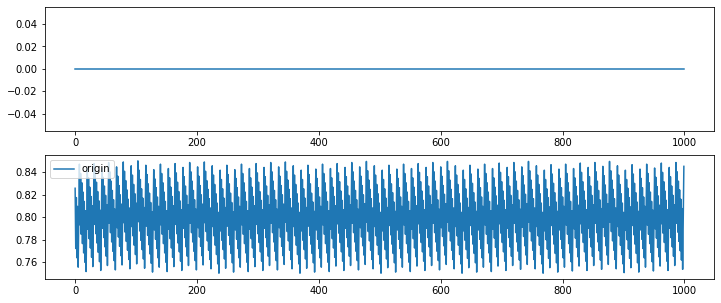

In [19]:
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.plot(result[:,1],label='predctions')
plt.subplot(212)
plt.plot(label[:,1],label='origin')
plt.legend()
plt.show()

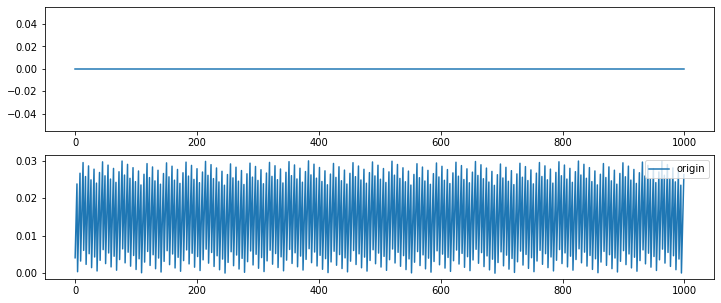

In [20]:
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.plot(result[:,2],label='predctions')
plt.subplot(212)
plt.plot(label[:,2],label='origin')
plt.legend()
plt.show()

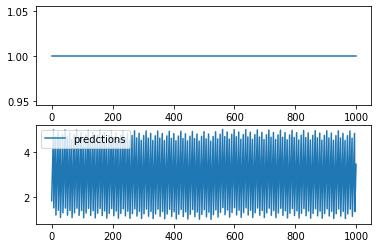

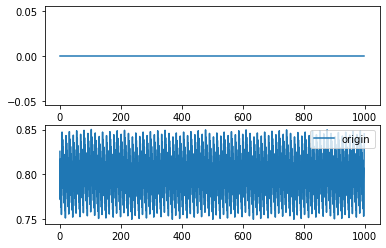

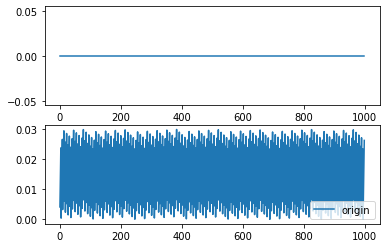

In [21]:
plt.figure(1)
plt.subplot(211)
plt.plot(result[:,0],label='predctions')
plt.subplot(212)
plt.plot(label[:,0],label='origin')
plt.legend(['predctions','origin'])

plt.figure(2)
plt.subplot(211)
plt.plot(result[:,1],label='predctions')
plt.subplot(212)
plt.plot(label[:,1],label='origin')
plt.legend()

plt.figure(3)
plt.subplot(211)
plt.plot(result[:,2],label='predctions')
plt.subplot(212)
plt.plot(label[:,2],label='origin')
plt.legend()
plt.show()

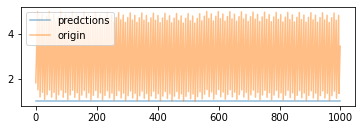

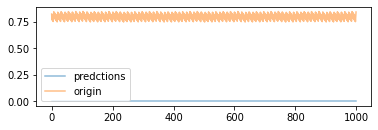

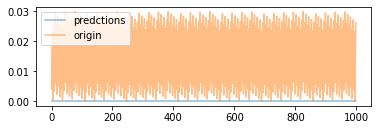

In [22]:
plt.figure(1)
plt.subplot(211)
plt.plot(result[:,0],label='predctions',alpha=0.5)
plt.plot(label[:,0],label='origin',alpha=0.5)
plt.legend(['predctions','origin'])

plt.figure(2)
plt.subplot(211)
plt.plot(result[:,1],label='predctions',alpha=0.5)
plt.plot(label[:,1],label='origin',alpha=0.5)
plt.legend()

plt.figure(3)
plt.subplot(211)
plt.plot(result[:,2],label='predctions',alpha=0.5)
plt.plot(label[:,2],label='origin',alpha=0.5)
plt.legend()
plt.show()